In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [49]:
df = pd.read_csv('BostonHousing.csv')
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  price  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2

In [50]:
# Checking no. of rows and columns 
df.shape

(506, 14)

In [51]:
# Checking for missing values
df.isnull().any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
b          False
lstat      False
price      False
dtype: bool

In [52]:
# Statistical measures of the dataset
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat       price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

###  Understanding the relations between various features of the dataset
#### 1. Positive Correlation
#### 2. Negative Correlation

In [53]:
corr = df.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

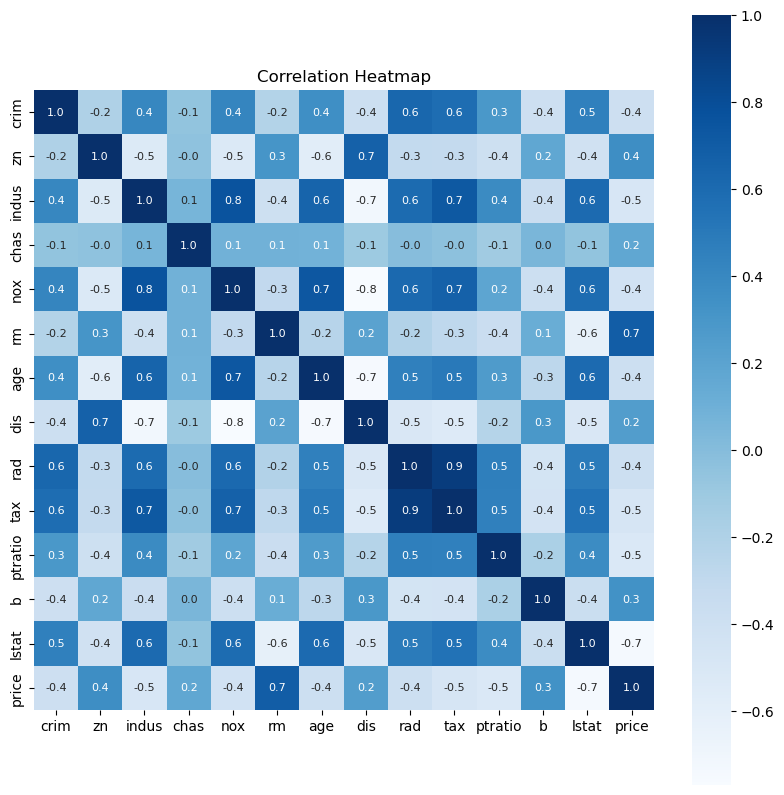

In [54]:
# Constructing a heatmap to visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.title('Correlation Heatmap')

In [55]:
# Splitting the data and the target
X =  df.drop(columns='price', axis=1)
y = df['price']

In [57]:
# Splitting the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


### Model Training - XGBoost Regressor

In [72]:
model = XGBRegressor()

In [73]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### Model Evaluation

In [74]:
y_train_predict = model.predict(X_train)

print('Training Data:')
print('R squared error:', r2_score(y_train, y_train_predict))

print('Mean Absolute Error:', mean_absolute_error(y_train, y_train_predict))

Training Data:
R squared error: 0.9999969829984965
Mean Absolute Error: 0.011182523717974735


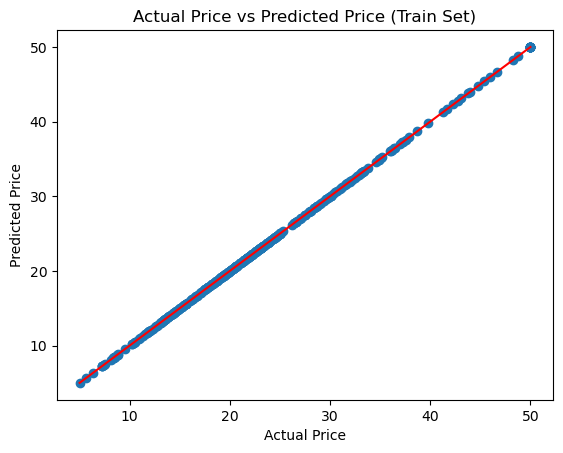

In [75]:
# Visualizing the actual prices and predicted prices of training data
plt.scatter(y_train, y_train_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price (Train Set)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')
plt.show()

In [76]:
y_test_predict = model.predict(X_test)

print('Testing Data:')
print('R squared error:', r2_score(y_test, y_test_predict))

print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_predict))

Testing Data:
R squared error: 0.9057837838492537
Mean Absolute Error: 1.8908873698290656


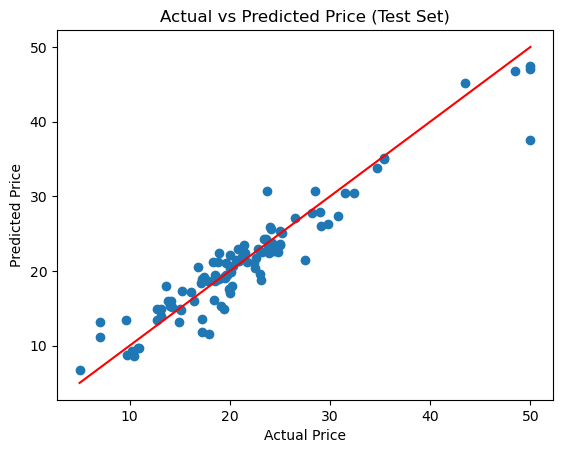

In [77]:
# Visualizing the actual prices and predicted prices of testing data
plt.scatter(y_test, y_test_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Test Set)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

### Building a prediction system

In [84]:
data = list(map(float, input().split(',')))
data_framed = pd.DataFrame([data], columns=df.columns[:-1])

prediction = model.predict(data_framed)

print(f'The house price will be approximately: ${prediction[0]:.2f}K')

 0.88125,0,21.89,0,0.624,5.637,94.7,1.9799,4,437,21.2,396.9,18.34


The house price will be approximately: $14.36K
